Import Libraries and read the CSV file

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
import prince
import seaborn as sns
import csv

sns.set()

customer_data = pd.read_csv('customer_data.csv')
customer_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look at the data to understand the fields.

In [98]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Look at the data types in the data frame

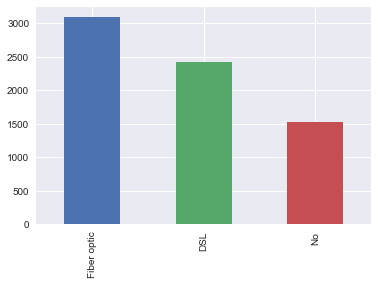

In [99]:
internet_counts = customer_data.InternetService.value_counts()
internet_counts.plot.bar()

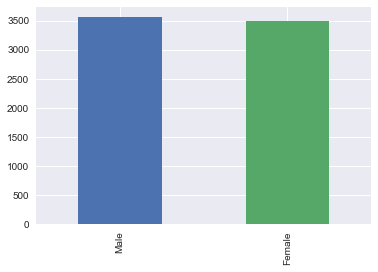

In [100]:
gender_counts = customer_data.gender.value_counts()
gender_counts.plot.bar()

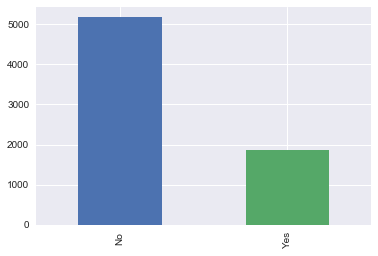

In [101]:
churn_counts = customer_data.Churn.value_counts()
churn_counts.plot.bar()

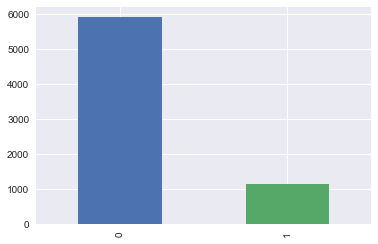

In [102]:
senior_counts = customer_data.SeniorCitizen.value_counts()
senior_counts.plot.bar()

Where 1 = Yes and 2 = No

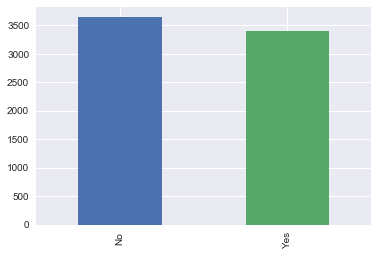

In [103]:
partner_counts = customer_data.Partner.value_counts()
partner_counts.plot.bar()

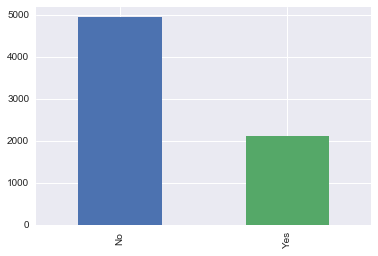

In [104]:
dependent_count = customer_data.Dependents.value_counts()
dependent_count.plot.bar()

In [105]:
customer_data.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Mean is 32, and Median is 29, which is not too far off and the Std. Deviation is 24.5 so it's understandable that we would have a max at 72, and a top 25% of 55.

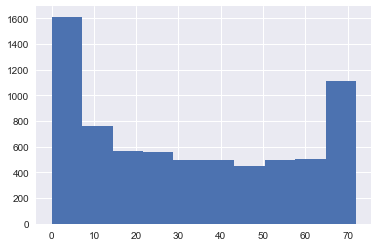

In [106]:
customer_data.tenure.hist()

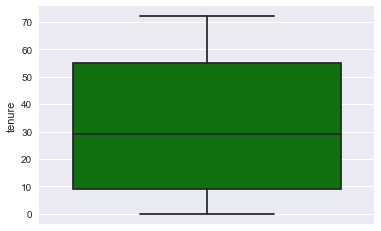

In [107]:
sns.boxplot(customer_data.tenure, color='green', orient = 'v')

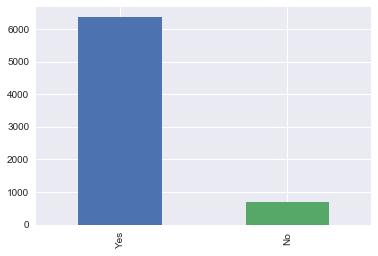

In [108]:
phone_count = customer_data.PhoneService.value_counts()
phone_count.plot.bar()

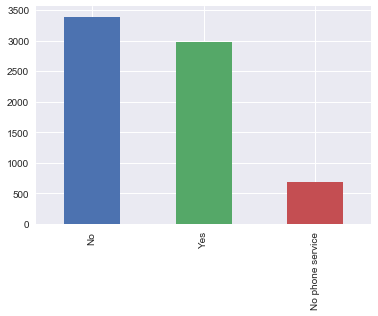

In [109]:
multi_line_count = customer_data.MultipleLines.value_counts()
multi_line_count.plot.bar()

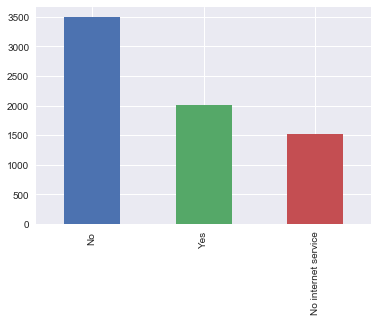

In [110]:
ols_count = customer_data.OnlineSecurity.value_counts()
ols_count.plot.bar()

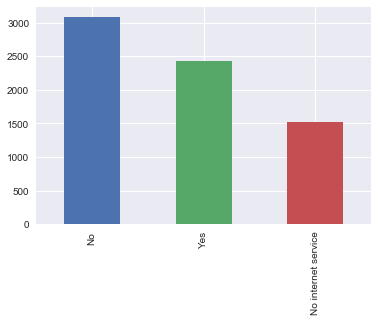

In [111]:
olb_count = customer_data.OnlineBackup.value_counts()
olb_count.plot.bar()

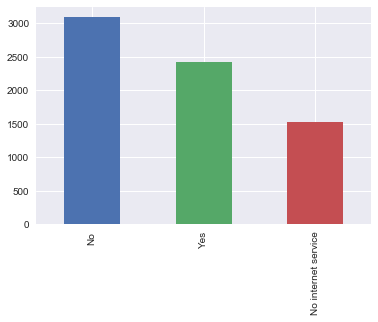

In [112]:
device_protection_count = customer_data.DeviceProtection.value_counts()
device_protection_count.plot.bar()

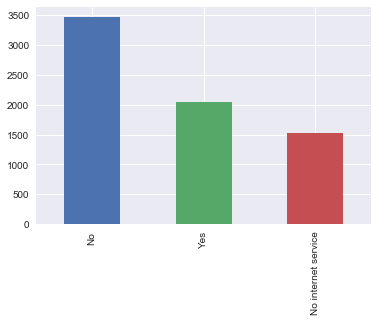

In [113]:
ts_count = customer_data.TechSupport.value_counts()
ts_count.plot.bar()

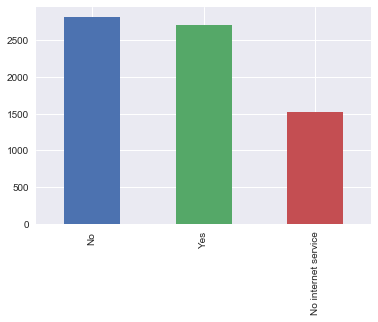

In [114]:
streaming_tv_counts = customer_data.StreamingTV.value_counts()
streaming_tv_counts.plot.bar()

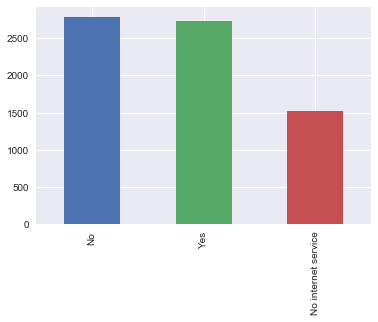

In [115]:
streaming_movie_counts = customer_data.StreamingMovies.value_counts()
streaming_movie_counts.plot.bar()

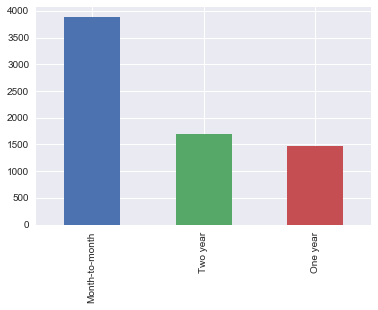

In [116]:
contract_counts = customer_data.Contract.value_counts()
contract_counts.plot.bar()

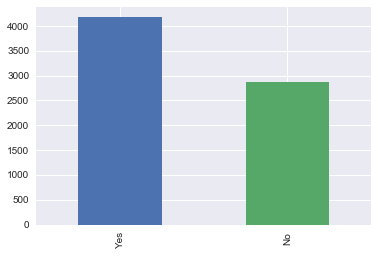

In [117]:
paperless_count = customer_data.PaperlessBilling.value_counts()
paperless_count.plot.bar()

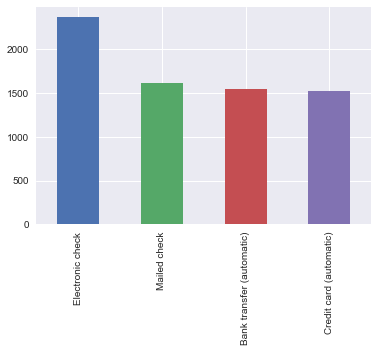

In [118]:
payment_method_counts = customer_data.PaymentMethod.value_counts()
payment_method_counts.plot.bar()

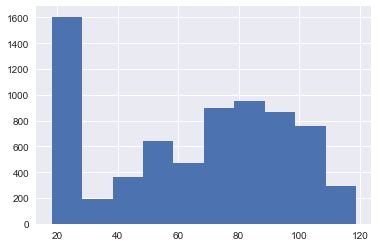

In [119]:
customer_data.MonthlyCharges.hist()

In [120]:
customer_data.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Looks like the MEAN charges are \$64.76 or approx. $65/month, but the median is closer to 70.The Standart Deviation accounts for the 25th and 75th quartiles, and the Max appears to be an outlier.

In [121]:
customer_data.MonthlyCharges.mode()

0    20.05
dtype: float64

The most common amount is \$20/month.

In [122]:
customer_data.TotalCharges = customer_data.TotalCharges.map(lambda x: x if x != ' ' else 0)
customer_data.TotalCharges = customer_data.TotalCharges.astype(float)
customer_data.TotalCharges.head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [123]:
customer_data.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

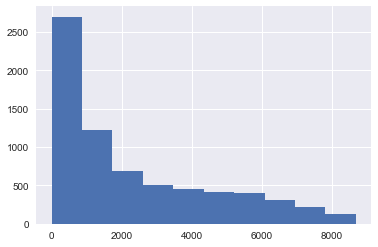

In [124]:
customer_data.TotalCharges.hist()

In [125]:
crosstabs = []
for c in customer_data.columns:
    if c != 'Churn' and c != 'customerID' and c != 'tenure' and c != 'MonthlyCharges' and c != 'TotalCharges':
        crosstabs.append(pd.crosstab(customer_data.Churn, customer_data[c], margins=True))
for c in crosstabs:
    print(c)

gender  Female  Male   All
Churn                     
No        2549  2625  5174
Yes        939   930  1869
All       3488  3555  7043
SeniorCitizen     0     1   All
Churn                          
No             4508   666  5174
Yes            1393   476  1869
All            5901  1142  7043
Partner    No   Yes   All
Churn                    
No       2441  2733  5174
Yes      1200   669  1869
All      3641  3402  7043
Dependents    No   Yes   All
Churn                       
No          3390  1784  5174
Yes         1543   326  1869
All         4933  2110  7043
PhoneService   No   Yes   All
Churn                        
No            512  4662  5174
Yes           170  1699  1869
All           682  6361  7043
MultipleLines    No  No phone service   Yes   All
Churn                                            
No             2541               512  2121  5174
Yes             849               170   850  1869
All            3390               682  2971  7043
InternetService   DSL  Fiber o

Now that we have our contingency tables, let's go through each of them to check if there's a group that is significantly churning more than the others.

In [126]:
crosstabs[0]

gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


Looking at the Contingency Table, we can visually determine that the two populations of male and female are roughly equivalent, and the proportions to which they churn are also roughtly equivalent, but in the interest of being thourough, I will run the Chi Squared Test to determine if these are statistically significantly different.

In [127]:
chiSq, p, dof,expected = scipy.stats.chi2_contingency(crosstabs[0].values)
print(f'ChiSquare {chiSq} P: {p}')

ChiSquare 0.522366503358827 P: 0.9712873885521255


As Mentioned, visually you can tell there is no statistical difference in the populations, and the ChiSquare value and P value confirms this.

In [128]:
expected

array([[2562.38989067, 2611.61010933, 5174.        ],
       [ 925.61010933,  943.38989067, 1869.        ],
       [3488.        , 3555.        , 7043.        ]])

Even in the context of the expected values, there appears to be nothing statistically interesting in this analysis.

In [129]:
crosstabs[1]

SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


Visually we can tell that non seniors appear to be churning slower than seniors. Mainly because there are lower overall number of seniors

In [130]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[1].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 160.35213184520632, P: 1.2285843790939117e-33


We can tell that the results in our sample data is Significant, especially considering how miniscule the P Value is. We can state clearly that there are some irregular things happening with our Seniors.

In [131]:
expected

array([[4335.05239245,  838.94760755, 5174.        ],
       [1565.94760755,  303.05239245, 1869.        ],
       [5901.        , 1142.        , 7043.        ]])

This is reinforced by our expected table of values which states that by pure chance, we should be seeing less Seniors churning. (Almost 200 less in the dataset)

In [132]:
crosstabs[2]

Partner,No,Yes,All
Churn,,,
No,2441,2733,5174
Yes,1200,669,1869
All,3641,3402,7043


Visually we can see that Customers that are receiving partner deals for services are generally more loyal with only about 700 out of 3400 churning. When compared to Those that are not receiving partner deals are churning a full 1/3 of the time. 

In [133]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[2].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 159.41452843242655, P: 1.9520350404613758e-33


Our Chi-Squared analysis confirms this with a P Value extremely close to Zero.

In [134]:
expected

array([[2674.78830044, 2499.21169956, 5174.        ],
       [ 966.21169956,  902.78830044, 1869.        ],
       [3641.        , 3402.        , 7043.        ]])

From the values of the expected table, we can clearly see that partner programs are extremely effective at retaining customers. (We can see an overperformance of around 300.)

In [135]:
crosstabs[3]

Dependents,No,Yes,All
Churn,,,
No,3390,1784,5174
Yes,1543,326,1869
All,4933,2110,7043


The issue with this contingency table is that the overall numbers are a little unclear, so I will also provide a table with matching percentages.

In [136]:
pd.crosstab(customer_data.Churn, customer_data.Dependents,margins=True, normalize=True)

Dependents,No,Yes,All
Churn,,,
No,0.481329,0.253301,0.73463
Yes,0.219083,0.046287,0.26537
All,0.700412,0.299588,1.00000


Now we can see that only about 30% of customers actually have Dependents at all. Of those with dependents, 15% churn where as those without 30% are likely to churn. This makes sense as those with dependents are more likely to be less focused on phone service where someone without could potentially be always looking for a better deal.

In [137]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[3].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 189.94033391334852, P: 5.4590465250260434e-40


Our P Value confirms that this isn't from chance that those with dependents don't churn as much as those that don't

In [138]:
expected

array([[3623.93042737, 1550.06957263, 5174.        ],
       [1309.06957263,  559.93042737, 1869.        ],
       [4933.        , 2110.        , 7043.        ]])

Our expected values also illustrate that customers with dependents should be churning more, if it were governed by chance

In [140]:
crosstabs[4]

PhoneService,No,Yes,All
Churn,,,
No,512,4662,5174
Yes,170,1699,1869
All,682,6361,7043


Visually we can see that most customers have phone service, and a good third of users are churning there, while those without phone service are churning equally, or slightly less. Let's take a look at the ChiSquared analysis

In [141]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(crosstabs[4].values)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 1.0044084772333213, P: 0.9091267853074723


And the ChiSquared analysis shows that the differences between those that do and don't have phone services are not statistically significant.

In [143]:
crosstabs[5]

MultipleLines,No,No phone service,Yes,All
Churn,,,,
No,2541,512,2121,5174
Yes,849,170,850,1869
All,3390,682,2971,7043


Since those with multiple lines are a subclass of those with phone service, let's re-evaluate our crosstable without the "No Phone Service" Category.

In [148]:
multi_line = customer_data[customer_data.MultipleLines != 'No phone service']
less_non_phone_users = pd.crosstab(multi_line.Churn, multi_line.MultipleLines, margins=True)
less_non_phone_users

MultipleLines,No,Yes,All
Churn,,,
No,2541,2121,4662
Yes,849,850,1699
All,3390,2971,6361


Here we can see a little more clearly that of customers that have phone service, we have roughly the same rate of churn for roughly the same size of population. We appear to have a rougly even split among those that do and those that don't have multiple lines of service.

In [150]:
chiSq, p, dof, expected = scipy.stats.chi2_contingency(less_non_phone_users)
print(f'ChiSquare: {chiSq}, P: {p}')

ChiSquare: 10.283453792632583, P: 0.03591425668303589


The statistic shows that we do have a significant difference from chance. Let's look at the expected values.

In [155]:
expected

array([[2484.5433108, 2177.4566892, 4662.       ],
       [ 905.4566892,  793.5433108, 1699.       ],
       [3390.       , 2971.       , 6361.       ]])

This shows us that our data isn't far all that far from the expected counts, but is still statistically significant.

In [152]:
crosstabs[6]

InternetService,DSL,Fiber optic,No,All
Churn,,,,
No,1962,1799,1413,5174
Yes,459,1297,113,1869
All,2421,3096,1526,7043


This is a little unclear as there is the mixture of classes against the simple binary of Yes a customer has internet, and no the customer does not. Let's see if we can merge the columns DSL and FiberOptic.Let's get our original data and copy it.

In [160]:
internet_data = customer_data
internet_data['InternetServiceYN'] = internet_data.InternetService.map({'DSL':'Yes', 'Fiber optic': 'Yes', 'No': 'No'})
pd.crosstab(internet_data.Churn,internet_data['InternetServiceYN'], margins=True )

InternetServiceYN,No,Yes,All
Churn,,,
No,1413,3761,5174
Yes,113,1756,1869
All,1526,5517,7043


From the looks of it, we have a large portion of Internet subscribers with about a third of them churning, and non-internet customers that appear to be churning a lot less.

In [162]:
pd.crosstab(internet_data.Churn, internet_data['InternetServiceYN'], margins=True, normalize=True)

InternetServiceYN,No,Yes,All
Churn,,,
No,0.200625,0.534005,0.73463
Yes,0.016044,0.249326,0.26537
All,0.216669,0.783331,1.00000


So, it appears that almost 80% of customers are internet users, and 26% of total users are churning with 24 of those 26% being Internet Users. This is by far our largest correlation so far.

In [188]:
customer_data.gender = customer_data.gender.map({'Male': 1, 'Female': 0})
customer_data.Partner = customer_data.Partner.map({'Yes': 1, 'No': 0})
customer_data.Dependents = customer_data.Dependents.map({'Yes': 1, 'No':0})
customer_data.PhoneService = customer_data.PhoneService.map({'Yes':1,'No':0})
customer_data.MultipleLines = customer_data.MultipleLines.map({'No phone service': 0, 'No': 1, 'Yes': 2})
customer_data.InternetService = customer_data.InternetService.map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
customer_data.OnlineSecurity = customer_data.OnlineSecurity.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.OnlineBackup = customer_data.OnlineBackup.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.DeviceProtection = customer_data.DeviceProtection.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.TechSupport = customer_data.TechSupport.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.StreamingTV = customer_data.StreamingTV.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.StreamingMovies = customer_data.StreamingMovies.map({'No internet service':0, 'No': 1, 'Yes': 2})
customer_data.Contract = customer_data.Contract.map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
customer_data.PaperlessBilling = customer_data.PaperlessBilling.map({'No': 0, 'Yes': 1})
customer_data.PaymentMethod = customer_data.PaymentMethod.map({'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
customer_data.Churn = customer_data.Churn.map({'Yes':1, 'No':0})
customer_data = customer_data.drop(columns=['customerID'])
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1,70.70,151.65,1


Let's separate our target variable.

In [199]:
churn_column = customer_data.Churn
customer_data = customer_data.drop(columns='Churn')
churn_column.head()

AttributeError: 'DataFrame' object has no attribute 'Churn'

In [198]:
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,0
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1


In [190]:
customer_data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.010380,-0.014418,-0.012230,-0.004720,-0.009409,-0.008673,-0.010011,0.000126,-0.011754,-0.010709,-0.014569,-0.000080
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,0.259390,0.081878,0.144828,0.140298,0.067457,0.167188,0.176469,-0.142554,0.156530,0.035614,0.220173,0.103006
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,-0.000132,0.091303,0.090753,0.098664,0.076551,0.079785,0.075098,0.294806,-0.014877,0.143949,0.096848,0.317504
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,-0.179631,-0.029721,-0.062775,-0.069078,-0.040788,-0.086739,-0.101475,0.243187,-0.111377,0.043494,-0.113890,0.062078
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.033230,0.232373,0.253743,0.253999,0.230522,0.201053,0.205031,0.671607,0.006152,0.366983,0.247900,0.826178
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,0.093720,-0.159989,-0.129770,-0.142012,-0.161930,-0.108239,-0.114715,0.002247,0.016505,-0.001724,0.247398,0.113214
MultipleLines,-0.009451,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,0.307988,0.069085,0.130619,0.124502,0.069149,0.165254,0.162841,0.083343,0.133255,0.126303,0.490700,0.412104
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.307988,1.000000,0.582325,0.658718,0.663011,0.586074,0.725645,0.723065,-0.290189,0.378108,0.113951,0.905491,0.428963
OnlineSecurity,-0.014418,0.081878,0.091303,-0.029721,0.232373,-0.159989,0.069085,0.582325,1.000000,0.705166,0.701690,0.735191,0.662220,0.667033,0.015824,0.184993,0.175390,0.635534,0.482624
OnlineBackup,-0.012230,0.144828,0.090753,-0.062775,0.253743,-0.129770,0.130619,0.658718,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,-0.035407,0.260715,0.181936,0.710477,0.537212


Since Monthly charges and Internet Service have a Pearson Correlation of 0.90, I will take the Internet Service Variable over Monthly Charges. Also since Total Charges and Tenure have a correlation of 0.82 I will take Tenure over Total Charges as the Total Charges are widely varied, and are more easily represented by tenure.

In [191]:
customer_data = customer_data.drop(columns=['TotalCharges'])
customer_data = customer_data.drop(columns=['MonthlyCharges'])
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,1
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,0
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,1


In [193]:
pca = prince.PCA(n_components = 5)
fit = pca.fit(customer_data)
fit = fit.transform(customer_data)
pca.column_correlations(customer_data)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4
gender,0.014989,0.005421,0.019249,-0.038031,0.602748
SeniorCitizen,-0.222474,-0.207059,-0.242946,0.340036,0.574688
Partner,-0.122990,0.633549,0.007146,-0.395060,0.336931
Dependents,0.103525,0.544960,0.158037,-0.640399,0.121687
tenure,-0.303079,0.778655,-0.047341,0.316058,0.027861
PhoneService,0.101201,0.101349,-0.876777,-0.159682,-0.176203
MultipleLines,-0.222063,0.223490,-0.860815,-0.056979,-0.103317
InternetService,-0.817767,-0.261949,-0.248445,-0.112302,0.030103
OnlineSecurity,-0.820969,0.036907,0.175410,-0.051975,-0.120128
OnlineBackup,-0.855386,-0.001284,0.079881,-0.031987,-0.042722


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


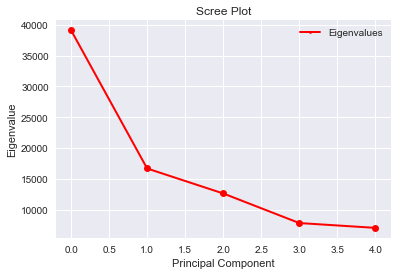

In [196]:
plt.plot(pca.column_correlations(customer_data).columns.values, pca.eigenvalues_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


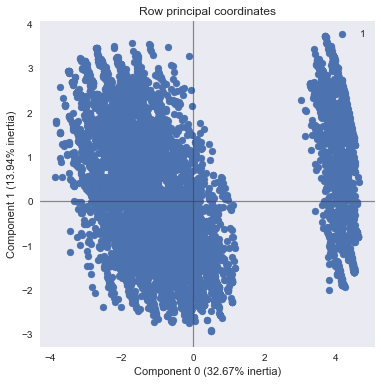

In [195]:
pca.plot_row_coordinates(customer_data)